<a href="https://colab.research.google.com/github/piacortes/astroclases/blob/master/Actividad_3_Astronom%C3%ADa_Gal%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001: Ciencia de datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

#Actividad Clase 3 - Uso de Astropy y Pandas.

###Objetivos:
1. Conocer la librerías Astropy y Pandas.
2. Reconocer el uso de Astropy con imágenes astronómicas. 
3. Trabajar con Pandas y bases de datos provevientes de Gaia y Kepler

##Astropy

([Documentación](https://docs.astropy.org/en/stable/))


`Astropy` es una de las librerías de Python que más se ocupan en astronomía. Incluye módulos y herramientas muy útiles y necesarias en astronomía, como por ejemplo:
- Constantes astronómicas y cosmológicas.
- Conversiones de tiempo y distancias.
- Manejo de datos astronómicos en formas de `ndarray`.
- Transformaciones de systemas de coordenadas.
- Herramientas para analysis estadístico y modelamiento.
- etc.

Como vimos en clases, el tipo de archivo más utilizado para manejar imágenes astrómicas es el `FIT: Flexible Image Transport`. La mayoría de los telescopios en el mundo utiliza este sistema de almacenaje de datos y la comunidad astronómica lo ha hecho uno de sus estándares más importantes.

###FIT

Sistema de almacenamiento de datos astronómicos en forma de `ndarray`. Tiene dos componentes principales: header y data. Header es una tabla de información con la forma de diccionario, mientras que data puede ser un `array` de 2 dimiensiones o un cubo, con más de dos dimensiones. Para los siguientes ejempos consideraremos la componente data como un `ndarray` de dos dimensiones.






###1. Abrir y leer un archivo `FIT` de la Nebulosa Horse Head

In [0]:
# Importar las librerías que usaremos: matplotlib y astropy. 
# Considerar que solo ocuparemos los módulos fits y download_file de astropy.

import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy.utils.data import download_file
import numpy as np


In [6]:
# Descargamos el archivo FIT
file = download_file("https://github.com/astrodatos/Clase3/raw/master/HorseHead.fits", cache=True )

In [0]:
# Abrir archivo fits guardado en file
hdu = fits.open(file)

In [11]:
# Por si solo, es un objeto
hdu

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f9b95025c90>, <astropy.io.fits.hdu.table.TableHDU object at 0x7f9b950303d0>]

In [13]:
hdu.info()

Filename: /root/.astropy/cache/download/py2/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


### 2. Guardar header y data en variables independientes

In [0]:
header_data = hdu[0].header

In [0]:
header_data

In [36]:
print(header_data[2])
print(header_data["DATE"])

2
2014-01-09


In [0]:
image_data = hdu[0].data

In [26]:
image_data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

In [0]:
print(image_data[0])
print(image_data[1][1])

In [27]:
print(image_data.shape)

(893, 891)


In [31]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))



('Min:', 3759)
('Max:', 22918)
('Mean:', 9831.481676287574)
('Stdev:', 3032.3927542049046)


###3. Plotear la imagen

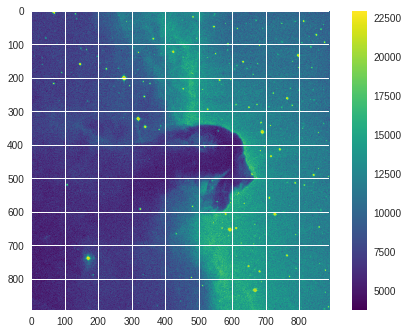

In [38]:
plt.figure()
plt.imshow(image_data, cmap='viridis') #grey, inferno, etc
plt.colorbar()

#Pandas

La librería `Pandas`es muy útil para el manejo de estructuras de datos. Está basado en `Numpy` pero incluye un nuevo concepto llamado Data Frame. Los Data Frame son arreglos multidimensionales, con sus respectivas etiquetas en filas y columnas, los cuales generalmente tienen distintos tipos de datos en su estructura como también datos faltantes. Todo lo anterior hace que `Pandas`  sea la mejor librería para trabajar con bases de datos.

In [0]:
import pandas as pd

###1. El objeto Serie

Una `Serie` es un arreglo unidimensional de datos indexados, esto quiere decir que está formado por una secuencia de valores y una secuencia de índices.

In [44]:
data = pd.Series([0.5, 0.32, 3])
data

0    0.50
1    0.32
2    3.00
dtype: float64

In [45]:
data.values

array([0.5 , 0.32, 3.  ])

In [46]:
data.index

RangeIndex(start=0, stop=3, step=1)

In [47]:
data[2]

3.0

In [49]:
data[0:2]



0    0.50
1    0.32
dtype: float64